In [1]:
#Setup
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd
df=pd.read_excel('file://localhost/Users/dane/Dropbox/Work/_WIP/15-Revenue_Prediction/Booking_Revenue_Plan_and_Forecast_History.xlsx', sheetname='RawData')
df['Date'] = pd.to_datetime(df['Date'])

# Analysis of the Accuracy of AWR Financial Projection

## REVISED 9/4/2015

## Executive Summary

Now that we have a public parent company there is a constant drive to improve our ability to predict our financial performance (revenue and bookings) on a quarterly basis. The first step to this is to understand our past.

Using the waterfall data for revenue and bookings from January 2008 to June 2015 I have collected our bookings and revenue plan, the numbers we put together at the beginning of each year, and forecast (FC), the updated numbers we come up with the first week of each quarter. I then analyzed the accuracy we have achieved over the last 30 quarters.

Here is a summary of the insights from this analysis:
* While bookings forecast accuracy is noticably better than plan accuracy, revenue forecast accuracy barely improves plan accuracy.
* Over the period the plan has predicted revenue to +/- $300K over 63% of the time although this has dropped to 42% over the last 3 years.
* A majority of the high revenue errors stem from high bookings errors in the same quarter.
* Large bookings prediction errors occur both above and below the planned amount. Most large revenue prediction errors occur when revenue comes in way over the prediction.

This article is broken down into 2 sections. Section 1 will provide the data directly related to the above insights while the Section 2 will provide additional background details.

## Data Supporting Insights

Trying to visualize the prediction accuracy of multiple measures at once is a challenge but I think that a cumulative probability curve does this best.  In this graph, the Y-axis gives you the percentage of quarters (since Jan-2008) where the predicted value was within the X-axis value of the actual result.

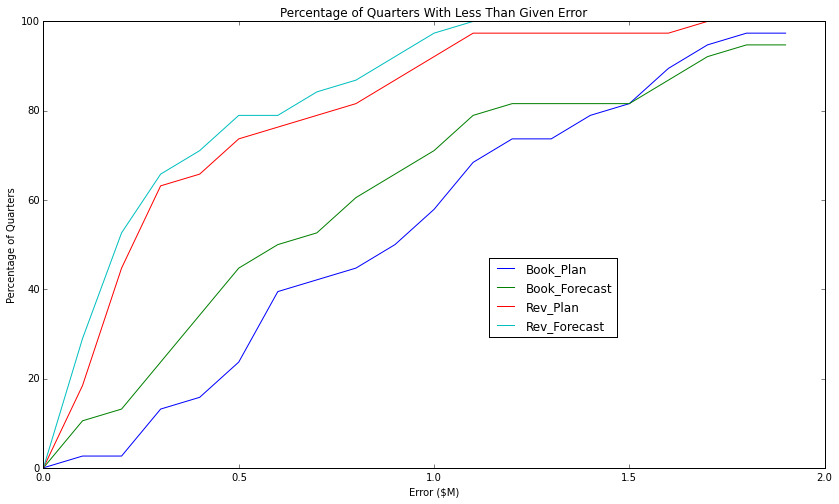

In [2]:
fig = plt.gcf()
fig.set_size_inches(14,8)
for tv in ['Book_Perr', 'Book_Fcerr', 'Rev_Perr', 'Rev_Fcerr']:
  x=df[tv]/1e6
  values, bins = np.histogram(x, bins=np.arange(0, 2.0, .10)) # go from 0 to 2M error
  # must normalize cumsum to number of samples
  cdf = np.append(0, values.cumsum()*100/len(df[tv]))
  p = plt.plot(bins,cdf)
plt.legend(['Book_Plan', 'Book_Forecast', 'Rev_Plan', 'Rev_Forecast'],
           bbox_to_anchor=[0.7,0.5], bbox_transform=fig.transFigure)
plt.title('Percentage of Quarters With Less Than Given Error')
plt.xlabel('Error ($M)')
plt.ylabel('Percentage of Quarters')
plt.show()

### Decrease in Revenue Prediction Accuracy

Since a lot of our focus has been on improving revenue prediction lets look at a histogram of the revenue prediction error.  In this graph, I have highlighted the quarters that are less that 3-years old.  From this we see that for quarters over 3 years old the error was much lower than in the more recent quarters.  It is hard to know what is causing this and it is an area that should be investigated more.

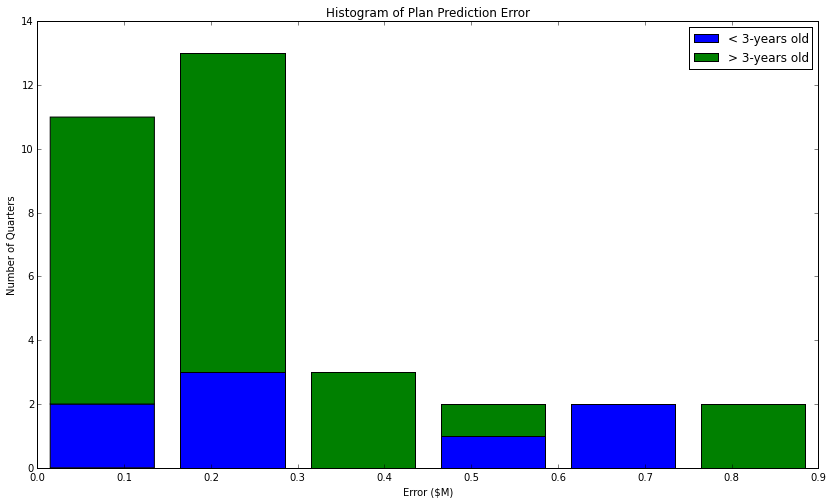

In [3]:
fig = plt.gcf()
fig.set_size_inches(14,8)
x = df[df.Recent == 'Yes']['Rev_Perr'] / 1.e6
y = df[df.Recent == 'No']['Rev_Perr'] / 1.e6
z = pd.DataFrame([x,y])
plt.hist([x,y], stacked=True, bins=np.arange(0,1.0,.15))
plt.legend(['< 3-years old', '> 3-years old'])
plt.title('Histogram of Plan Prediction Error')
plt.xlabel('Error ($M)')
plt.ylabel('Number of Quarters')
plt.show()

### Booking Error Impact On Revenue Prediction

It is natural to think that revenue prediction errors are caused by bookings prediction errors and in most cases that does appear to be the case.  If we look at all the quarters where the revenue prediction was in error by more than $300K and we plot that error against the bookings error for that quarter we see that a grouping of errors where high positive bookings errors (bookings above target) resulted in high revenue errors and the same on the negative side, which makes intuitive sense.

For two leftmost points where bookings were more than $1.5M below target but revenue came in significantly above target, one of is explained by the $1.3M perpetual revenue piracy order we rolled over from Q3 2013 to Q1 2014. The other was Q2 2012 when we booked the ZTE piracy order and the bookings error is somewhat artificial.

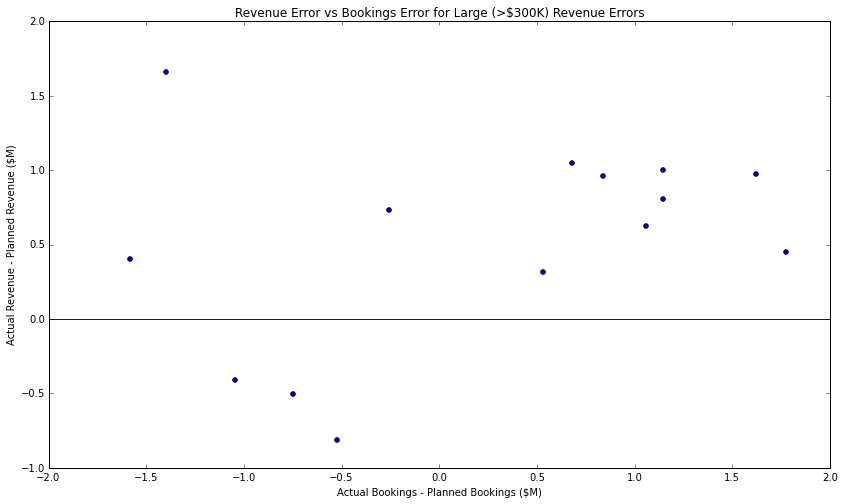

In [4]:
fig = plt.gcf()
fig.set_size_inches(14,8)
high_error = df[df.Rev_Perr > 300000]
plt.scatter(high_error.Book_AmP/1e6, high_error.Rev_AmP/1e6)
plt.xlabel('Actual Bookings - Planned Bookings ($M)')
plt.ylabel('Actual Revenue - Planned Revenue ($M)')
plt.title('Revenue Error vs Bookings Error for Large (>$300K) Revenue Errors')
plt.axhline(y=0)
plt.show()

### High Prediction Error

To focus on the high error points let's look at the high revenue prediction errors and high booking prediction errors.

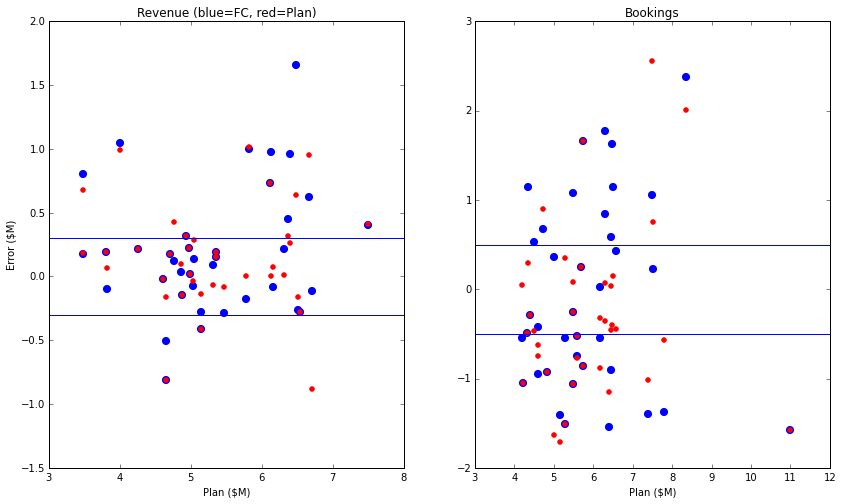

In [5]:
fig = plt.gcf()
fig.set_size_inches(14,8)
plt.figure(1)
plt.subplot(121)

plt.scatter(df.Rev_Plan/1e6, df.Rev_AmP/1e6, color='blue', s=50)

plt.scatter(df.Rev_Plan/1e6, df.Rev_AmFC/1e6, color='red')
plt.title('Revenue (blue=FC, red=Plan)')
plt.xlabel('Plan ($M)')
plt.ylabel('Error ($M)')
plt.axhline(y=0.3)
plt.axhline(y=-0.3)
plt.subplot(122)

plt.scatter(df.Book_Plan/1e6, df.Book_AmP/1e6, color='blue', s=50)

plt.scatter(df.Book_Plan/1e6, df.Book_AmFC/1e6, color='red')
plt.title('Bookings')
plt.xlabel('Plan ($M)')
plt.axhline(y=0.5)
plt.axhline(y=-0.5)
plt.show()

Here we can see that for revenue, most plan "misses" are due to predicting too low a revenue. For bookings, the errors are much more distributed with both over- and under-predictions.

## Additional Details

First let's look at the distribution of our bookings and revenue.  For bookings we see that our we tend not to predict the high outcomes we achieve.  Basically our bookings predictions are on the conservative side which makes sense.

On the revenue front we see that in general we raise our forecast numbers over our plan numbers.

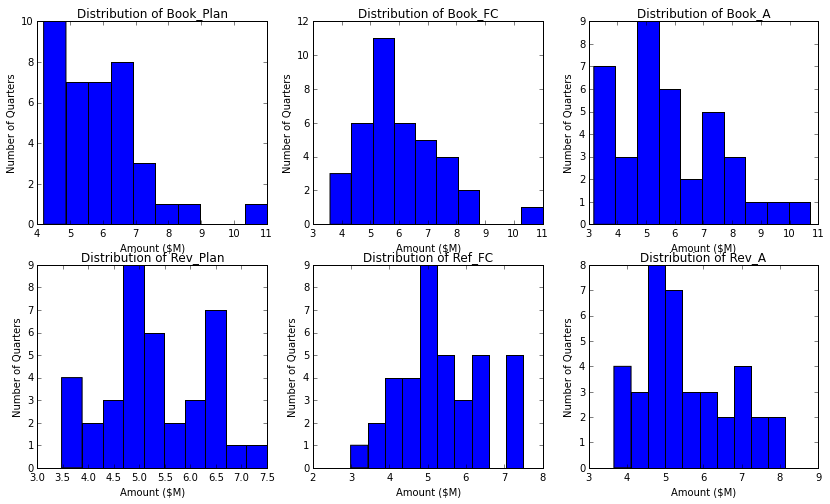

In [6]:
values = ['Book_Plan', 'Book_FC', 'Book_A', 'Rev_Plan', 'Ref_FC', 'Rev_A']
#for x in values:
#    df[x] = df[x]/1e6 # convert to $M
sp = [111,122,123,214,225,236]
fig = plt.gcf()
fig.set_size_inches(14,8)

for i,v in enumerate(values):
    plt.subplot(2,3,i+1)
    plt.hist(df[v]/1e6)
    plt.title('Distribution of ' + v)
    plt.xlabel('Amount ($M)')
    plt.ylabel('Number of Quarters')
plt.show()

Now when we look at the errors, as we saw in the cumulative distribution the bookings forecast is a clear improvement over the bookings plan as seen in the prediction error histograms. This is not the case for revenue.

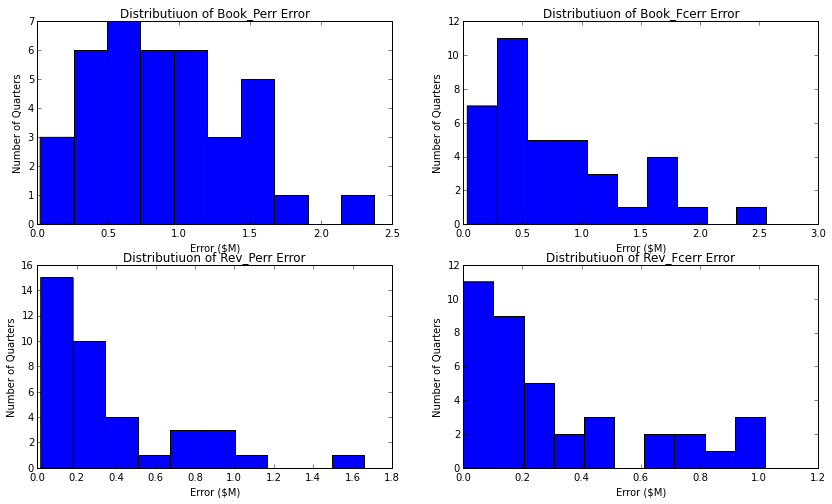

In [7]:
values = ['Book_Perr','Book_Fcerr', 'Rev_Perr', 'Rev_Fcerr']

fig = plt.gcf()
fig.set_size_inches(14,8)

for i,v in enumerate(values):
    plt.subplot(2,2,i+1)
    plt.hist(df[v]/1e6)
    plt.title('Distributiuon of ' + v + ' Error')
    plt.xlabel('Error ($M)')
    plt.ylabel('Number of Quarters')
plt.show()

Next let's look at this error over time.

*Note:* The x-axes for these graphs are the quarters in chronological order.  They are just labeled as integers for the regression analysis.

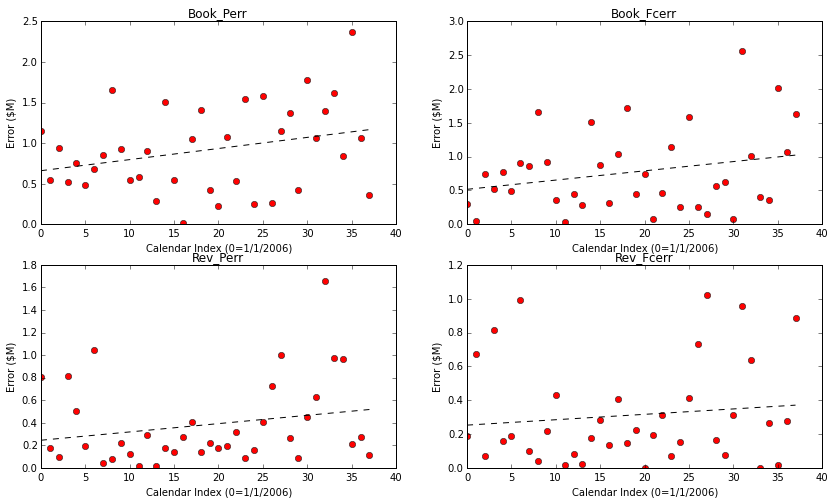

In [8]:
values = ['Book_Perr','Book_Fcerr', 'Rev_Perr', 'Rev_Fcerr']

fig = plt.gcf()
fig.set_size_inches(14,8)

for i,v in enumerate(values):
    plt.subplot(2,2,i+1)
    x = range(0,38)
    y = df[v]/1e6
    fit = np.polyfit(x,y,1)
    fit_fn = np.poly1d(fit) 
    plt.plot(x,y, 'ro', x, fit_fn(x), '--k')
    plt.title(v)
    plt.xlabel('Calendar Index (0=1/1/2006)')
    plt.ylabel('Error ($M)')
plt.show()

From this we see the a very little change in the accuracy of the bookings prediction but there is definitely a time element to the revenue error.  There was high error in 2007 and again starting a few year ago.  The common factor to those two periods are very large pirate orders and higher growth of the business.

## Conclusions

In working with this data I draw the following conclusions (YMMV):

* If we want to improve revenue prediction we need to improve bookings predictions which is very hard to do.
* Our model of predicting revenue works, on average, very well if we are willing to accept a +/- $300K window.
* When we have significant errors it is almost always on the high side due to unexpected prepetual orders and is not a big cause for concern.
* The decrease in accuracy is of concern but it seems likely to be because of large unpredicted orders which are a good, not a bad thing.

---